In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#IMPORTAR LIBRERIAS NECESARIAS 
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split

In [3]:
# CREAR EL DATAFRAME CON PANDAS
df=pd.read_csv("/workspaces/cathycaz-intro-ml/data/raw/internal-link.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# ESTABLECER EL ID COMO ÍNDICE
df.set_index("id", inplace=True)
pd.set_option('display.max_columns', None) # PARA QUE ME MUESTRE TODAS LAS COLUMNAS (ESTO SE USA CUANDO HAY MUCHAS COLUMNAS Y TE APARECEN MUCHAS SIMPLIFICADAS CON PUNTOS SUSPENSIVOS)
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# INFORMACION DE LA TABLA
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [6]:
# COMPROBACION DE COLUMNAS CON UN SOLO VALOR 
unicos = df.nunique()
df[unicos[unicos==1].index] 
# NO HAY COLUMNAS CON UN SOLO VALOR


""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


In [7]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN TODAS LAS COLUMNAS POR DEFECTO
df.duplicated().sum()
# NO HAY COLUMNAS DUPLICADAS

np.int64(0)

In [17]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS; CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE COLUMNAS CON DATOS DUPLICADOS Y FALSE COLUMNAS SIN DATOS DUPLICADOS)
df.duplicated(keep=False) 


id
2539        False
2595        False
3647        False
3831        False
5022        False
            ...  
36484665    False
36485057    False
36485431    False
36485609    False
36487245    False
Length: 48895, dtype: bool

In [18]:
# COMPROBACIÓN DE DATOS DUPLICADOS EN (FILAS DE DATA ORIGINAL) QUE CON LA TRANSPUESTA LAS CONVERTIMOS EN COLUMNAS (ESTO ES SOLO VISUALMENTE, NO SIGNIFICA LITERALMENRTE QUE LAS FILAS SE HAYAN CONVERTIDO EN COLUMNAS)
df.T.duplicated().sum()
# NO HAY COLUMNAS DUPLICADAS EN LA TRANSPUESTA

np.int64(0)

In [19]:
# AUNQUE SABEMOS QUE NO HAY VALORES DIPLICADOS; CON ESTE CÓDIGO PUEDO GENERAR UNA TABLA CON TRUE Y FALSE (TRUE COLUMNAS CON DATOS DUPLICADOS Y FALSE COLUMNAS SIN DATOS DUPLICADOS)
df.T.duplicated(keep=False) 

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

1- SI ENCUENTRA ALGÚN DATO DUPLICADO APLICAR ESTO 

df.T.duplicated(keep=False) 

PARA QUE ME GENERE UNA TABLA CON TRUE Y FALSE (TRUE COLUMNAS CON DATOS DUPLICADOS Y FALSE COLUMNAS CSIN DATOS DUPLICADOS)

2- EN ESTE CASO NO HAY DATOS DUPLICADOS, PERO SI ENCONTRAMOS DATOS DUPLICADOS EN UNA COLUMNA APLICAMOS ESTO 

df.drop('nombre de la columna', axis=1, inplace=True)

In [11]:
#ELIMINAR DATOS REDUNDANTES SI LOS HUBIERA O COLUMNAS QUE NO APORTAN INFORMACION RELEVANTE
# PODEMOS ELIMINAR HOST NAME YA QUE ES UN IDENTIFICADOR IGUAL QUE EL HOST ID
df.drop(['host_name'], axis=1, inplace=True)


In [12]:
# NUEVO DATAFRAME SIN LA COLUMNA HOST_NAME
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# DATOS FALTANTES EN NUMEROS 
df.isnull().sum()


name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# DATOS FALTANTES EN PORCENTAJE
df.isnull().mean()*100

name                               0.032723
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

DE MOMENTO NO ELIMINARÉ LAS COLUMNAS CON DATOS FALTANTES PORQUE NO SÉ SI MAS ADELANTE ME PUEDAN SERVIR! Y ADEMAS ES UN 20%

In [15]:
# COMPROBAR LOS DATOS CON FILAS QUE TIENEN DATOS NULOS MAYORES A 2
n = 2
df[df.isnull().sum(axis=1) ==n]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
7750,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
11452,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
11943,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


<Axes: >

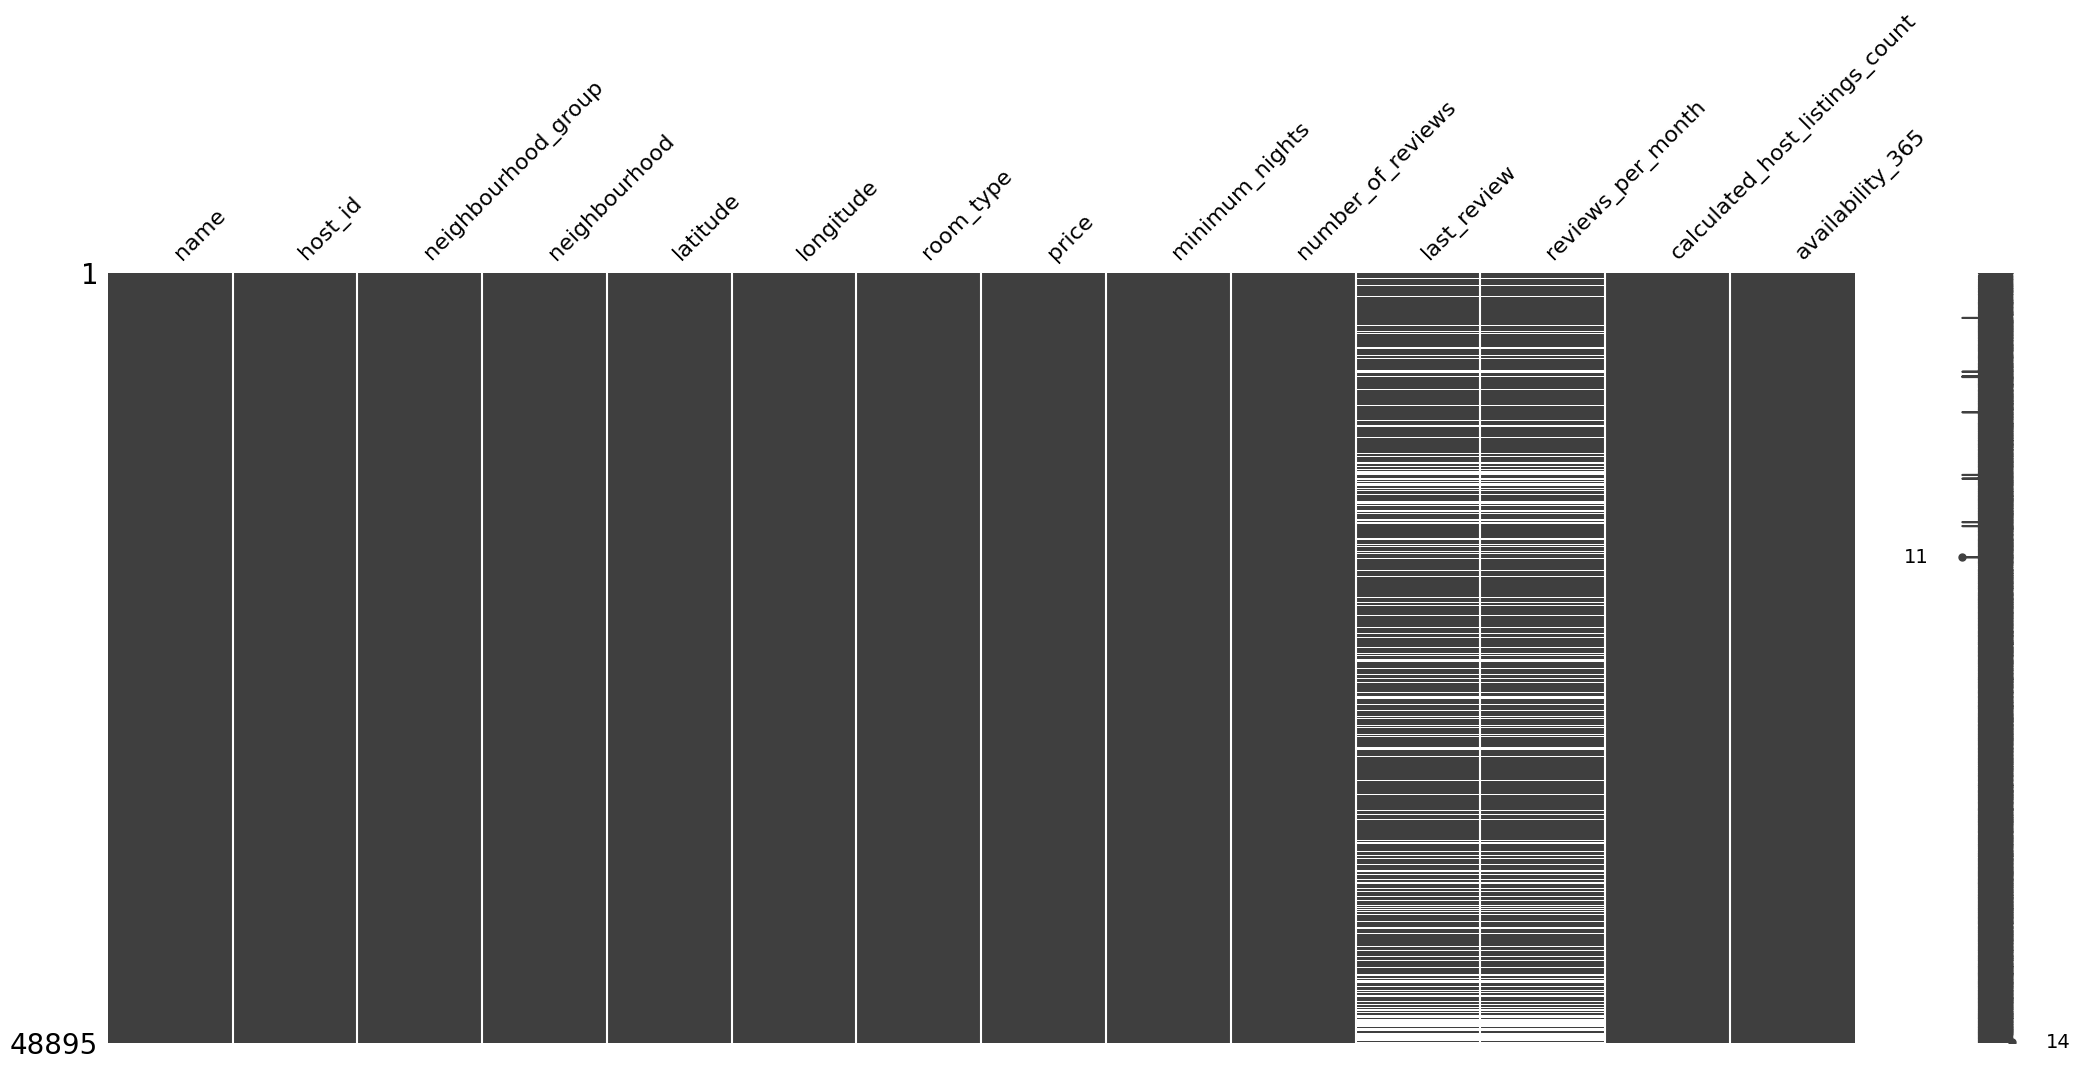

In [16]:
# VISUALIZACION DE DATOS FALTANTES CON MISSINGNO EN FORMA DE MATRIZ
msno.matrix(df)